In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import h5py
import math
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ph-data.csv to ph-data.csv


In [ ]:
data = pd.read_csv("ph-data.csv")
display(data.tail())
train_data = data[: (int((len(data))*0.8))]
test_data = data[(int((len(data))*0.8)) :]                    

# """def correlation(data, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = data.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in data.columns:
#                     del data[colname] # deleting the column from the dataset
#     return data                

# data = correlation(data,0.5)
# print(data)

,blue,green,red,label
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13
652,131,2,77,14


In [ ]:
X_train = np.array(train_data.drop(["label"] , axis = 1).copy()).T
Y_train = np.array([train_data['label'].copy()])

X_test = np.array(test_data.drop(["label"] , axis = 1).copy()).T
Y_test = np.array([test_data['label'].copy()])

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(3, 522)
(1, 522)
(3, 131)
(1, 131)


In [ ]:
mean = np.array([np.mean(X_train , axis = 1)]).T  #normalizing the training set
max = np.array([np.max(X_train , axis = 1)]).T
min = np.array([np.min(X_train , axis=1)]).T
X_train = ((X_train - mean) / (max - min))

print(X_train.shape)
print(Y_train.shape)

mean = np.array([np.mean(X_test , axis = 1)]).T  #normalizing the test set
max = np.array([np.max(X_test , axis = 1)]).T
min = np.array([np.min(X_test , axis=1)]).T
X_test = ((X_test - mean) / (max - min))

print(X_test.shape)
print(Y_test.shape)



(3, 522)
(1, 522)
(3, 131)
(1, 131)


In [ ]:
X_train = X_train.T                             #increasing features of X_train
for j in range(X_train.shape[1]) :
  a = np.copy(X_train[:,j]) 
  for i in range(2,7) :


    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T        
    # elif i == 4:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
    # elif i == 5:
    #   temp = np.array([np.power(a,i)]).T  
    # if i == 2 :
    #   temp = np.array([np.sin(a)]).T
    # elif i == 7:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)]).T      

    else:
      temp = np.array([a*X_train[:,j+1]]).T                 
    print(temp.shape)
    X_train = np.hstack((X_train,temp))
X_train = X_train.T
print(X_train.shape)


X_test = X_test.T                             #increasing features of X_train
for j in range(X_test.shape[1]) :
  a = np.copy(X_test[:,j]) 
  for i in range(2,7) :

    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T        
    # elif i == 4:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
    # if i == 2:
    #   temp = np.array([np.power(a,i)]).T  
    # elif i == 6 :
    #   temp = np.array([np.sin(a)]).T
    # elif i == 7:
    #   temp = np.array([np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)*np.sin(a)]).T      

    else:
      temp = np.array([a*X_test[:,j+1]]).T                 
    print(temp.shape)
    X_test = np.hstack((X_test,temp))
X_test = X_test.T
print(X_test.shape)


In [ ]:
#initialize_parameters
parameters={}
parameters["W"] = np.random.randn(1,X_train.shape[0])
parameters["b"] = np.zeros((1,1))

In [ ]:
def linear_regression_test(X,Y,parameters):
  

  #forward
    H_test = np.dot(parameters["W"],X) + parameters["b"]

    return H_test



In [ ]:

def linear_regression_train(X,Y,num_iterations,learning_rate):
  m=X.shape[1]

  for i in range(num_iterations):


  #forward
    H_train = np.dot(parameters["W"],X) + parameters["b"]
    # print(H_train)

  #cost
    cost = (1/(2*m))*(np.sum(np.power((H_train-Y),2)))/(100000000)
    
  #backprop

    dW = (1/m)*(np.dot((H_train-Y),X.T))
    db = (1/m)*(np.sum(H_train-Y))

  #update

    parameters["W"]  = parameters["W"]  - learning_rate*dW
    parameters["b"]  = parameters["b"]  - learning_rate*db

   #R2_score of test
    H_test =linear_regression_test(X_test,Y_test,parameters)
    from sklearn.metrics import r2_score
    r2_test = r2_score(Y_test.T,H_test.T)

    print("cost={} ,iteration={} ,r2_score ={}".format(cost,i,r2_test))

    


  return parameters,H_train,H_test



In [ ]:
parameters,H_train,H_test =linear_regression_train(X_train,Y_train,num_iterations=30000,learning_rate=0.8)
#print(parameters["W"])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train.T,H_train.T)
print(r2)

0.7047930368183074


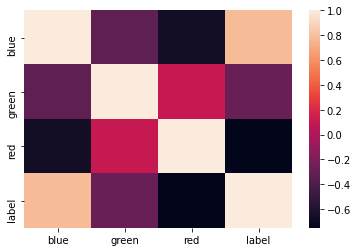

In [ ]:
corr = data.corr()
sns.heatmap(corr)

In [ ]:
print(H_test[0,1])
# print(Y_test)
print(np.sum(np.abs(H_test) -  np.abs(Y_test)))

for i in range(X_test.shape[1]):
  print("{}    ,    {}".format(H_test[0,i],Y_test[0,i]))
